In [1]:
'''
LIBRARIES
'''
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-dataset/hour.csv
/kaggle/input/bike-sharing-dataset/Readme.txt
/kaggle/input/bike-sharing-dataset/day.csv


In [3]:
%%time
#Getting data from kaggle
data1 = pd.read_csv('/kaggle/input/bike-sharing-dataset/day.csv')
data2 = pd.read_csv('/kaggle/input/bike-sharing-dataset/hour.csv')


CPU times: user 33.1 ms, sys: 12.7 ms, total: 45.8 ms
Wall time: 69.8 ms


In [4]:
print('data1',data1.shape)
print('data2',data2.shape)

data1 (731, 16)
data2 (17379, 17)


In [5]:
data1.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
data2.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [7]:
df = data2 # I would like to data2 to be dataset for my model

In [8]:
drop_feature = ['instant', 'dteday']

In [9]:
df.drop(columns=drop_feature, inplace=True)


In [10]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
def pipeline_model (mymodel):
    number_scale =  ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
    cat_scale = ['season', 'yr', 'mnth', 'hr', 'holiday','weekday','workingday','weathersit']


    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(),number_scale),
            ('cat', OneHotEncoder(), cat_scale)
        ])

    # Create a pipeline with preprocessing and the classifier
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', mymodel)])
    
    return model

models = {
    'KNN': KNeighborsRegressor(n_neighbors=3, metric='manhattan'),
    'SVM': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forrest': RandomForestClassifier(random_state=42)
}


In [12]:
y = df.cnt
features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 
            'season', 'yr', 'mnth', 'hr', 'holiday','weekday','workingday','weathersit']
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

differences = {}
for name, tip in models.items():
    
    model = pipeline_model(tip)
    model.fit(X_train, y_train)
    
    #Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print('Model {} prediction here: '.format(name))
    print("Mean Absolute Error:", mae)
    differences['mydata'] = y_test
    differences[f'pred_{name}'] = y_pred
    
    
    

X_train shape:  (13034, 14)
X_test shape:  (4345, 14)
y_train shape:  (13034,)
y_test shape:  (4345,)
Model KNN prediction here: 
Mean Absolute Error: 26.329113924050635
Model SVM prediction here: 
Mean Absolute Error: 19.991215639058947
Model Decision Tree prediction here: 
Mean Absolute Error: 2.3686996547756043
Model Random Forrest prediction here: 
Mean Absolute Error: 23.703107019562715


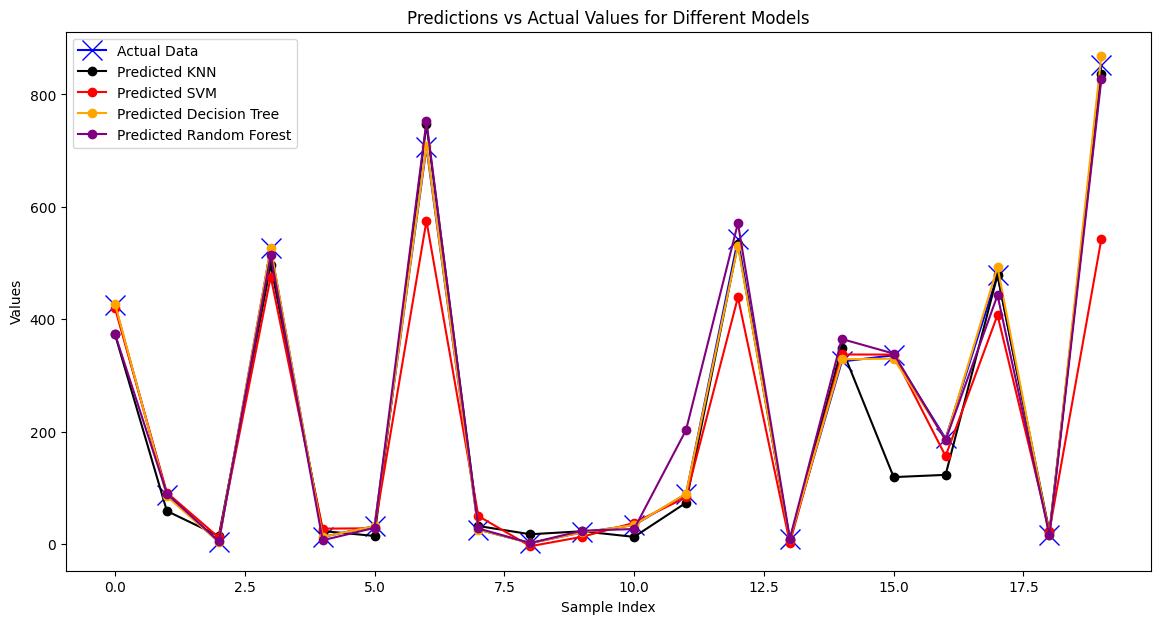

In [13]:
# Convert to DataFrame
df = pd.DataFrame(differences).iloc[:20]
df = df.reset_index(drop=True)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the actual data in blue
ax.plot(df.index, df['mydata'], marker='x', color='blue', linestyle='-', label='Actual Data',markersize=15)

# Plot the predictions in green
ax.plot(df.index, df['pred_KNN'], marker='o', color='black', linestyle='-', label='Predicted KNN')
ax.plot(df.index, df['pred_SVM'], marker='o', color='red', linestyle='-', label='Predicted SVM')
ax.plot(df.index, df['pred_Decision Tree'], marker='o', color='orange', linestyle='-', label='Predicted Decision Tree')
ax.plot(df.index, df['pred_Random Forrest'], marker='o', color='purple', linestyle='-', label='Predicted Random Forest')

# Ensure each label appears only once in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

ax.set_xlabel('Sample Index')
ax.set_ylabel('Values')
ax.set_title('Predictions vs Actual Values for Different Models')

plt.show()